<a href="https://colab.research.google.com/github/ShravyaMalogi/Data-Analytics/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION


**Simple Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1], [2], [3], [4], [5], [6]])  # Hours studied
y = np.array([50, 55, 65, 70, 75, 85])        # Exam scores

# Model training
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

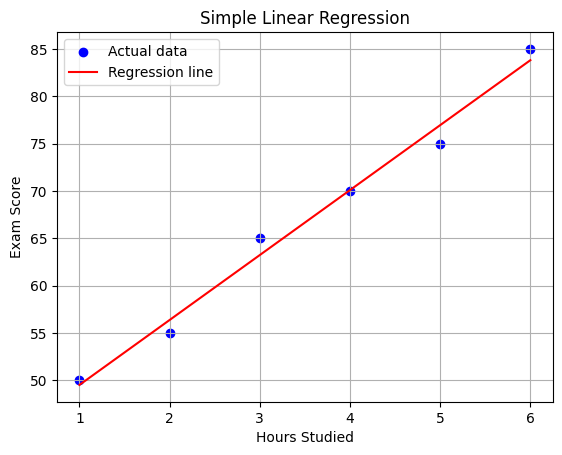

In [ ]:
# @title
# Visualization
plt.scatter(X, y, color='blue', label='Actual data')  # Data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Regression line
plt.title("Simple Linear Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Predict a new value
new_X = np.array([[7.5]])
predicted_score = model.predict(new_X)

print(f"📘 Predicted score for 7.5 hours of study: {predicted_score[0]:.2f}")

📘 Predicted score for 7.5 hours of study: 94.10


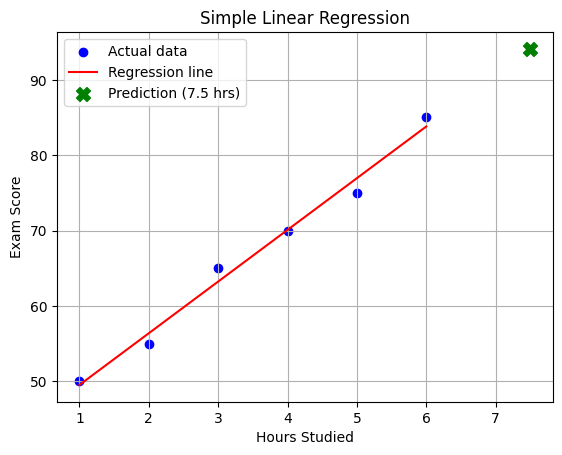

In [ ]:
# @title
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.scatter(new_X, predicted_score, color='green', label='Prediction (7.5 hrs)', marker='X', s=100)
plt.title("Simple Linear Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()

**Multiple Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
# Features: [Hours Studied, Practice Tests Taken]
X = np.array([
    [1, 0],
    [2, 1],
    [3, 1],
    [4, 2],
    [5, 2],
    [6, 3]
])

# Target: Exam scores
y = np.array([52, 55, 63, 68, 75, 85])

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for a new student who studied 7 hours and took 3 tests
new_X = np.array([[7, 3]])
predicted_score = model.predict(new_X)

# Show the prediction
print(f"📘 Predicted score for 7 hours study & 3 practice tests: {predicted_score[0]:.2f}")

# Coefficients and intercept (equation)
print("🧮 Regression equation:")
print(f"Score = {model.coef_[0]:.2f} * Hours + {model.coef_[1]:.2f} * Tests + {model.intercept_:.2f}")

📘 Predicted score for 7 hours study & 3 practice tests: 89.83
🧮 Regression equation:
Score = 7.25 * Hours + -1.25 * Tests + 42.83


📘 Predicted score for 7 hours study & 3 practice tests: 89.83


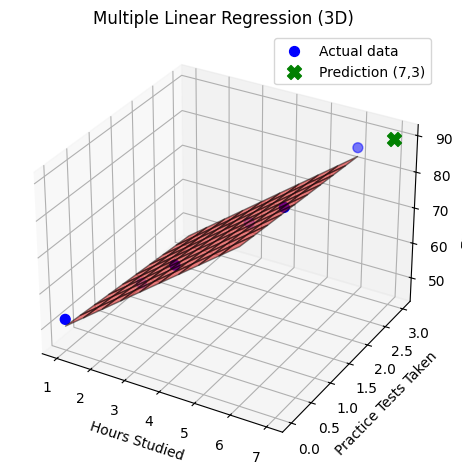

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Sample data
X = np.array([
    [1, 0],
    [2, 1],
    [3, 1],
    [4, 2],
    [5, 2],
    [6, 3]
])
y = np.array([52, 55, 63, 68, 75, 85])

# Model training
model = LinearRegression()
model.fit(X, y)

# Predict for a new student
new_X = np.array([[7, 3]])
predicted_score = model.predict(new_X)
print(f"📘 Predicted score for 7 hours study & 3 practice tests: {predicted_score[0]:.2f}")

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract individual features
hours = X[:, 0]
tests = X[:, 1]

# Scatter original data points
ax.scatter(hours, tests, y, color='blue', label='Actual data', s=50)

# Create a grid for the plane
hours_range = np.linspace(hours.min(), hours.max(), 10)
tests_range = np.linspace(tests.min(), tests.max(), 10)
hours_grid, tests_grid = np.meshgrid(hours_range, tests_range)

# Predict scores on the grid
X_grid = np.c_[hours_grid.ravel(), tests_grid.ravel()]
y_pred_grid = model.predict(X_grid).reshape(hours_grid.shape)

# Plot regression plane
ax.plot_surface(hours_grid, tests_grid, y_pred_grid, alpha=0.5, color='red', edgecolor='k')

# Add predicted point
ax.scatter(new_X[0][0], new_X[0][1], predicted_score, color='green', s=100, label='Prediction (7,3)', marker='X')

# Labels and legend
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Practice Tests Taken')
ax.set_zlabel('Exam Score')
ax.set_title('Multiple Linear Regression (3D)')
ax.legend()

plt.tight_layout()
plt.show()

**Polynomial Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data (Experience vs Salary)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([30000, 35000, 40000, 50000, 65000, 80000, 100000, 130000, 165000, 200000])

# Transform the data to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict for a new experience value (e.g., 6.5 years)
new_X = np.array([[6.5]])
new_X_poly = poly.transform(new_X)
predicted_salary = model.predict(new_X_poly)

print(f"📘 Predicted salary for 6.5 years of experience: ₹{predicted_salary[0]:,.2f}")

📘 Predicted salary for 6.5 years of experience: ₹92,087.12


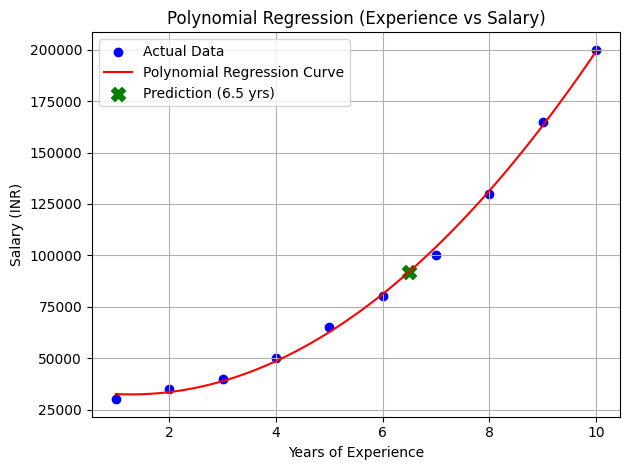

In [ ]:
# @title
# Visualization
plt.scatter(X, y, color='blue', label='Actual Data')

# Generate a smooth curve
X_range = np.linspace(1, 10, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot the curve
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Regression Curve')

# Mark prediction point
plt.scatter(new_X, predicted_salary, color='green', s=100, marker='X', label='Prediction (6.5 yrs)')

plt.title("Polynomial Regression (Experience vs Salary)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Logistic Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Sample data
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Hours studied
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # 0 = fail, 1 = pass

# Model training
model = LogisticRegression()
model.fit(X, y)

# Predict probability of passing for 6.5 hours of study
new_X = np.array([[6.5]])
predicted_prob = model.predict_proba(new_X)[0][1]
predicted_class = model.predict(new_X)[0]

print(f"📘 Probability of passing for 6.5 hours study: {predicted_prob:.2f}")
print(f"✅ Predicted class: {'Pass' if predicted_class == 1 else 'Fail'}")

📘 Probability of passing for 6.5 hours study: 0.77
✅ Predicted class: Pass


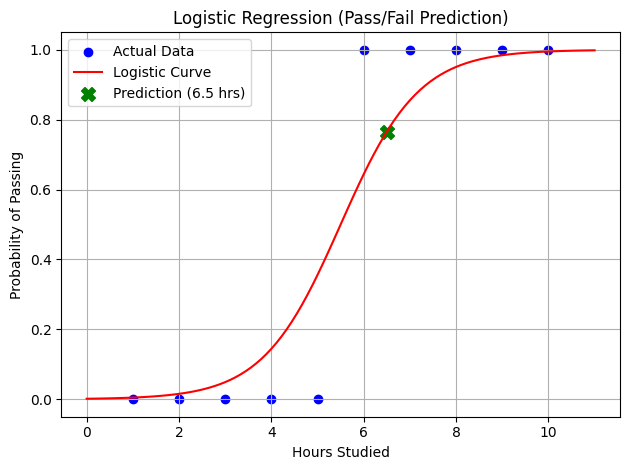

In [ ]:
# @title
# Visualization
X_range = np.linspace(0, 11, 100).reshape(-1, 1)
y_probs = model.predict_proba(X_range)[:, 1]

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_probs, color='red', label='Logistic Curve')
plt.scatter(new_X, predicted_prob, color='green', s=100, marker='X', label='Prediction (6.5 hrs)')

plt.title("Logistic Regression (Pass/Fail Prediction)")
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Ridge Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Sample data (slightly noisy)
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([50, 53, 66, 68, 74, 87])  # Exam scores (some noise)

# Ridge Regression model (alpha is the regularization strength)
model = Ridge(alpha=1.0)
model.fit(X, y)

# Predict for new value
new_X = np.array([[7.5]])
predicted_score = model.predict(new_X)

print(f"📘 Predicted score for 7.5 hours of study (Ridge): {predicted_score[0]:.2f}")

# Predict over a range for plotting
X_range = np.linspace(1, 8, 100).reshape(-1, 1)
y_pred_range = model.predict(X_range)

📘 Predicted score for 7.5 hours of study (Ridge): 93.36


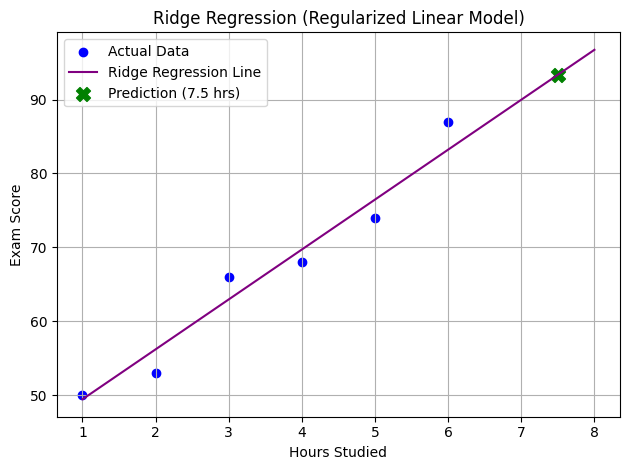

In [ ]:
# @title
# Visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_pred_range, color='purple', label='Ridge Regression Line')
plt.scatter(new_X, predicted_score, color='green', s=100, marker='X', label='Prediction (7.5 hrs)')

plt.title("Ridge Regression (Regularized Linear Model)")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Lasso Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Sample data
# [Hours Studied, Distractions per Hour]
X = np.array([
    [1, 10],
    [2, 9],
    [3, 8],
    [4, 7],
    [5, 6],
    [6, 5]
])
y = np.array([40, 50, 60, 70, 80, 90])  # Exam scores

# Train Lasso model
model = Lasso(alpha=0.1)
model.fit(X, y)

# Predict a new score
new_X = np.array([[7, 4]])
predicted_score = model.predict(new_X)
print(f"📘 Predicted score for 7 hours of study with 4 distractions/hr: {predicted_score[0]:.2f}")

# Show coefficients
print("🔎 Coefficients:")
print(f"Hours Studied: {model.coef_[0]:.2f}")
print(f"Distractions per Hour: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

📘 Predicted score for 7 hours of study with 4 distractions/hr: 99.88
🔎 Coefficients:
Hours Studied: 9.97
Distractions per Hour: -0.00
Intercept: 30.12


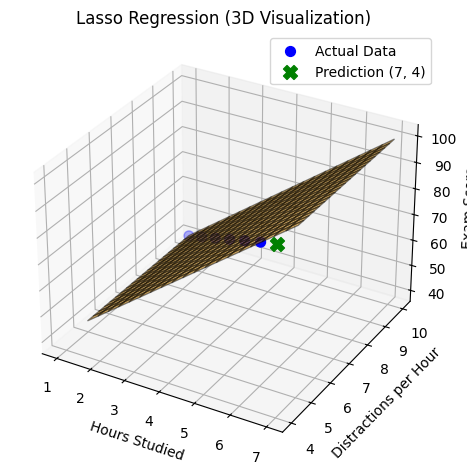

In [ ]:
# @title
# Visualization
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Separate features
hours = X[:, 0]
distractions = X[:, 1]

# Plot actual data
ax.scatter(hours, distractions, y, color='blue', label='Actual Data', s=50)

# Create grid for surface
hours_range = np.linspace(hours.min(), hours.max() + 1, 20)
distractions_range = np.linspace(distractions.min(), distractions.max(), 20)
hours_grid, distractions_grid = np.meshgrid(hours_range, distractions_range)
grid_points = np.c_[hours_grid.ravel(), distractions_grid.ravel()]
score_predictions = model.predict(grid_points).reshape(hours_grid.shape)

# Plot regression surface
ax.plot_surface(hours_grid, distractions_grid, score_predictions, alpha=0.5, color='orange', edgecolor='k')

# Plot predicted point
ax.scatter(new_X[0][0], new_X[0][1], predicted_score, color='green', s=100, marker='X', label='Prediction (7, 4)')

# Labels
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Distractions per Hour")
ax.set_zlabel("Exam Score")
ax.set_title("Lasso Regression (3D Visualization)")
ax.legend()

plt.tight_layout()
plt.show()

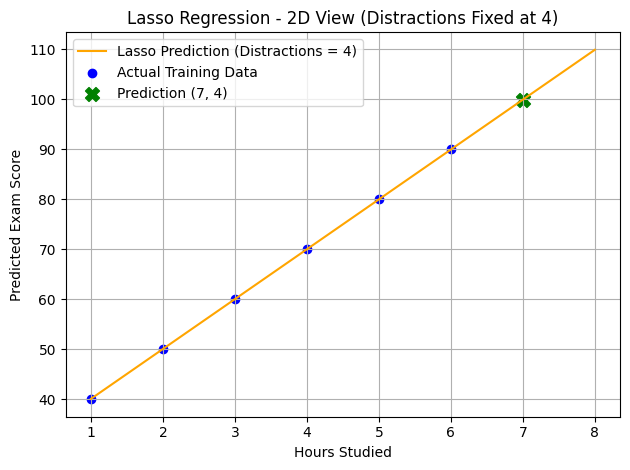

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Sample data
# [Hours Studied, Distractions per Hour]
X = np.array([
    [1, 10],
    [2, 9],
    [3, 8],
    [4, 7],
    [5, 6],
    [6, 5]
])
y = np.array([40, 50, 60, 70, 80, 90])  # Exam scores

# Train Lasso model
model = Lasso(alpha=0.1)
model.fit(X, y)

# Predict for a new student (optional)
new_X = np.array([[7, 4]])
predicted_score = model.predict(new_X)

# 🟩 2D Plot: Fix distractions = 4, vary hours studied
hours_range = np.linspace(1, 8, 100)
distractions_fixed = 4
X_plot = np.column_stack((hours_range, np.full_like(hours_range, distractions_fixed)))
y_plot = model.predict(X_plot)

# Actual training data where distractions are ~4–10 (for visual reference)
hours_actual = X[:, 0]
scores_actual = y

# Plotting
plt.plot(hours_range, y_plot, color='orange', label='Lasso Prediction (Distractions = 4)')
plt.scatter(hours_actual, scores_actual, color='blue', label='Actual Training Data')
plt.scatter(new_X[0][0], predicted_score, color='green', s=100, marker='X', label='Prediction (7, 4)')

plt.title("Lasso Regression - 2D View (Distractions Fixed at 4)")
plt.xlabel("Hours Studied")
plt.ylabel("Predicted Exam Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# EVALUATION METRICS

**R2 score**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])  # Not perfectly linear → so we’ll get a moderate R²

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# R² Score
r2 = r2_score(y, y_pred)
print(f"🔍 R² score: {r2:.2f}")

🔍 R² score: 0.60


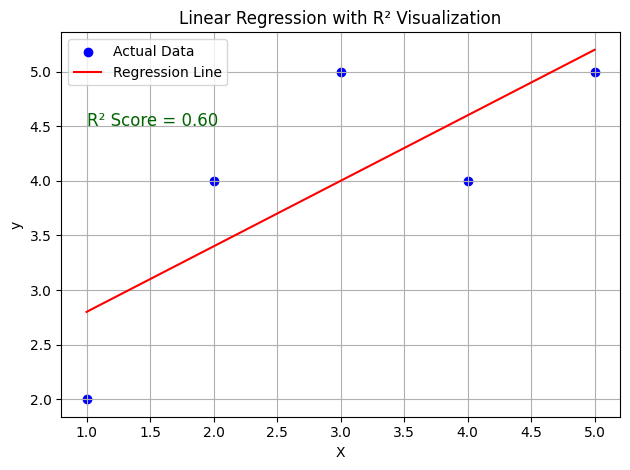

In [ ]:
# @title

# Plot actual vs predicted
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')

# Show R² score on plot
plt.text(1, max(y) - 0.5, f"R² Score = {r2:.2f}", fontsize=12, color='darkgreen')

# Labels and aesthetics
plt.title("Linear Regression with R² Visualization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Mean Absolute Error**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate MAE
mae = mean_absolute_error(y, y_pred)
print(f"📏 Mean Absolute Error (MAE): {mae:.2f}")

📏 Mean Absolute Error (MAE): 0.64


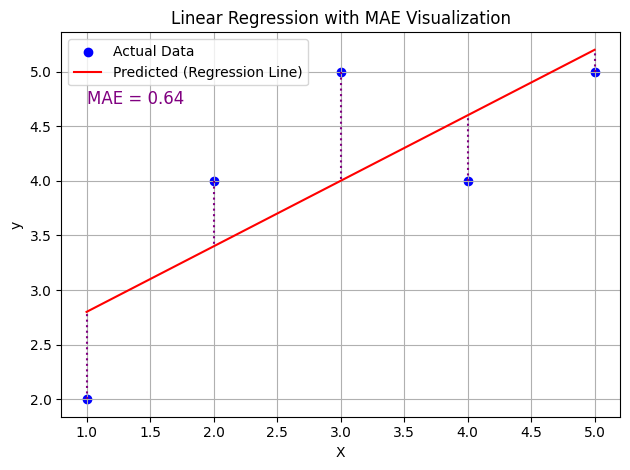

In [ ]:
# @title

# Visualize predictions
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Predicted (Regression Line)')

# Draw vertical error lines
for xi, yi, ypi in zip(X, y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='purple', linestyle='dotted')  # error lines

# Show MAE on the plot
plt.text(1, max(y) - 0.3, f"MAE = {mae:.2f}", fontsize=12, color='purple')

# Labels and formatting
plt.title("Linear Regression with MAE Visualization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Mean Squared Error**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"📐 Mean Squared Error (MSE): {mse:.2f}")

📐 Mean Squared Error (MSE): 0.48


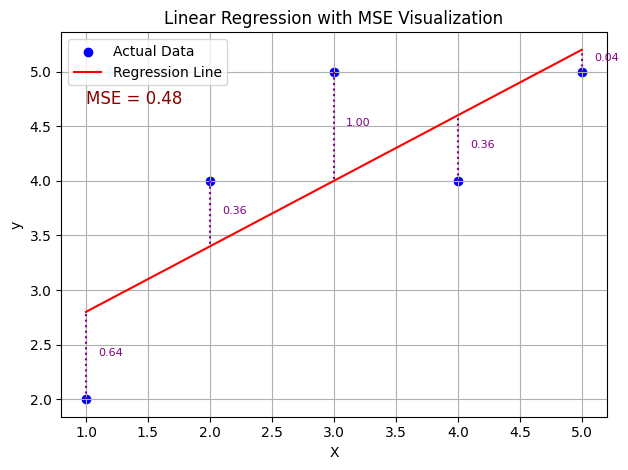

In [ ]:
# @title

# Plot actual vs predicted
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')

# Draw vertical error lines (squared error visualization)
for xi, yi, ypi in zip(X, y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='purple', linestyle='dotted')  # error lines
    mid_y = (yi + ypi) / 2
    plt.text(xi + 0.1, mid_y, f"{(yi - ypi) ** 2:.2f}", fontsize=8, color='purple')

# Show MSE on the plot
plt.text(1, max(y) - 0.3, f"MSE = {mse:.2f}", fontsize=12, color='darkred')

# Labels and formatting
plt.title("Linear Regression with MSE Visualization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Root Mean Squared Error**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate MSE and RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f"📐 Root Mean Squared Error (RMSE): {rmse:.2f}")

📐 Root Mean Squared Error (RMSE): 0.69


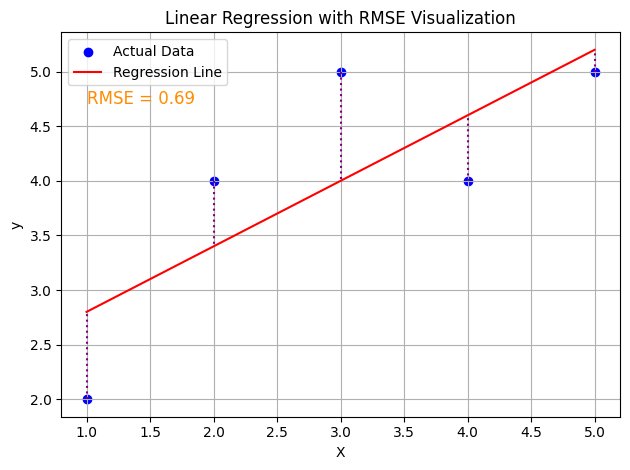

In [ ]:
# @title
# Plot actual vs predicted
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')

# Visualize error lines (same as before)
for xi, yi, ypi in zip(X, y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='purple', linestyle='dotted')  # error lines

# Show RMSE on the plot
plt.text(1, max(y) - 0.3, f"RMSE = {rmse:.2f}", fontsize=12, color='darkorange')

# Labels and aesthetics
plt.title("Linear Regression with RMSE Visualization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# BLUE (Best Linear Unbiased Estimator)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated data satisfying Gauss-Markov assumptions
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random X from 0 to 10
true_slope = 5
true_intercept = 3
noise = np.random.normal(0, 2, size=(100, 1))  # Homoscedastic normal error

# Generate y = 5x + 3 + noise
y = true_slope * X + true_intercept + noise

# Train OLS model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Coefficients
print(f"Estimated Slope: {model.coef_[0][0]:.2f}")
print(f"Estimated Intercept: {model.intercept_[0]:.2f}")

Estimated Slope: 4.91
Estimated Intercept: 3.43


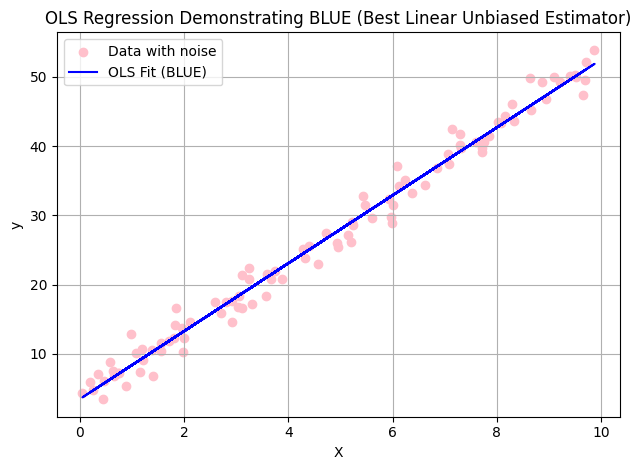

In [ ]:
# Visualization
plt.scatter(X, y, label='Data with noise', color='pink')
plt.plot(X, y_pred, color='blue', label='OLS Fit (BLUE)')
plt.title("OLS Regression Demonstrating BLUE (Best Linear Unbiased Estimator)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Least Square Estimation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simple data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Fit linear regression model using least squares
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f"Estimated line: y = {slope:.2f}x + {intercept:.2f}")

# Calculate residuals (errors)
residuals = y - y_pred
squared_errors = residuals ** 2
sum_squared_errors = np.sum(squared_errors)
print(f"Sum of Squared Errors (SSE): {sum_squared_errors:.2f}")

Estimated line: y = 0.60x + 2.20
Sum of Squared Errors (SSE): 2.40


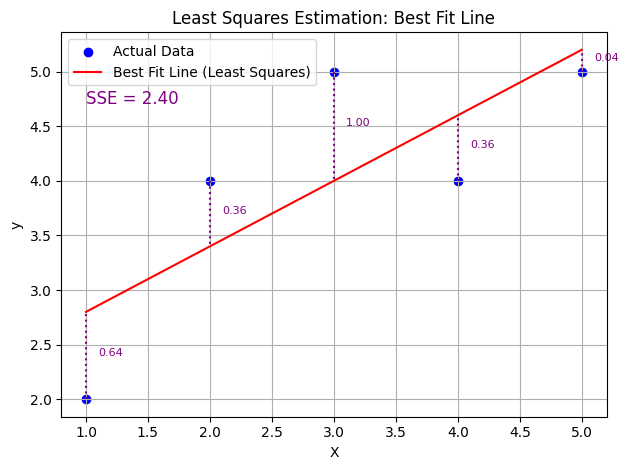

In [ ]:
# @title
# Plotting the data
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Best Fit Line (Least Squares)')

# Show residuals
for xi, yi, ypi in zip(X, y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='purple', linestyle='dotted')
    plt.text(xi + 0.1, (yi + ypi)/2, f"{(yi - ypi)**2:.2f}", fontsize=8, color='purple')

# Show SSE on plot
plt.text(1, max(y)-0.3, f"SSE = {sum_squared_errors:.2f}", color='purple', fontsize=12)

# Labels
plt.title("Least Squares Estimation: Best Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ARIMA

**Time series data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 1. Create sample time series data (e.g., monthly sales)
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales = np.linspace(200, 500, 36) + np.random.normal(0, 15, 36)  # Trend + noise
data = pd.Series(sales, index=dates)

# 2. Fit ARIMA model (p=1, d=1, q=1 as a starting point)
model = ARIMA(data, order=(1, 1, 1))  # ARIMA(p, d, q)
fitted_model = model.fit()

# 3. Forecast next 6 months
forecast = fitted_model.forecast(steps=6)
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')

# 4. Combine data for visualization
forecast_series = pd.Series(forecast, index=forecast_index)

/tmp/ipython-input-44-1226487635.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=36, freq='M')
/tmp/ipython-input-44-1226487635.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


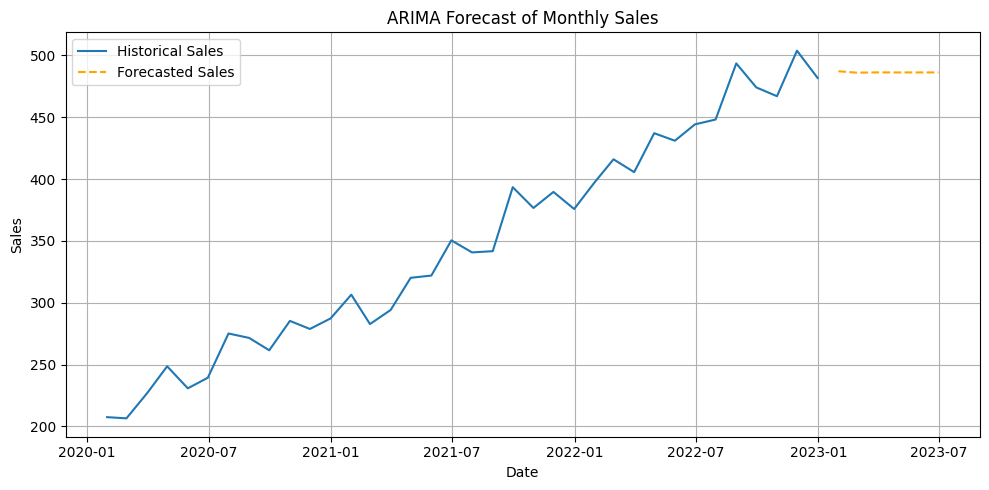

In [ ]:
# @title

# 5. Plot actual data + forecast
plt.figure(figsize=(10, 5))
plt.plot(data, label='Historical Sales')
plt.plot(forecast_series, label='Forecasted Sales', linestyle='dashed', color='orange')
plt.title("ARIMA Forecast of Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Seasonal-Trend Decomposition Using Loess**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# 1. Create a sample time series (monthly pattern + trend + noise)
np.random.seed(42)
months = pd.date_range(start='2020-01-01', periods=48, freq='M')
seasonal_pattern = 10 * np.sin(2 * np.pi * months.month / 12)
trend = np.linspace(100, 200, 48)
noise = np.random.normal(0, 3, 48)
sales = trend + seasonal_pattern + noise

data = pd.Series(sales, index=months)

# 2. STL decomposition
stl = STL(data, seasonal=13)  # 13 is recommended for monthly data
result = stl.fit()

/tmp/ipython-input-46-1818565370.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2020-01-01', periods=48, freq='M')


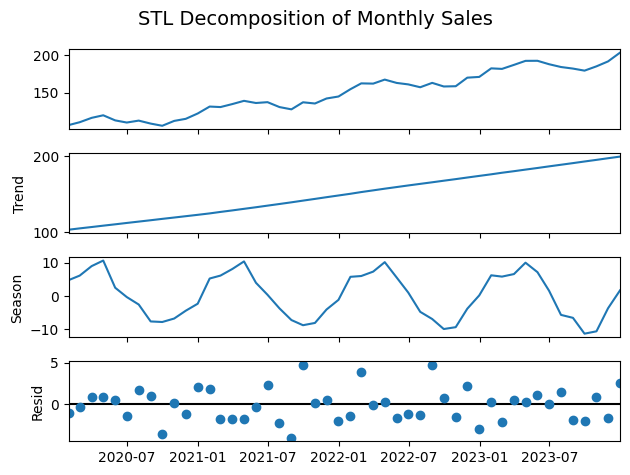

In [ ]:
# @title

# 3. Plot the components
result.plot()
plt.suptitle("STL Decomposition of Monthly Sales", fontsize=14)
plt.tight_layout()
plt.show()

# TREE BUILDING

**Regression Trees**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Step 1: Sample house dataset
data = pd.DataFrame({
    'Area (sqft)': [1000, 1500, 2000, 2500, 3000, 3500],
    'Bedrooms': [2, 3, 3, 4, 4, 5],
    'Price (in Lakhs)': [50, 65, 80, 100, 120, 150]
})

# Step 2: Split into features (X) and target (y)
X = data[['Area (sqft)', 'Bedrooms']]
y = data['Price (in Lakhs)']

# Step 3: Train regression tree
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X, y)

# Step 4: Predict price for a new house
new_house = np.array([[2750, 4]])  # 2750 sqft, 4 bedrooms
predicted_price = model.predict(new_house)
print(f"🏠 Predicted Price for 2750 sqft, 4 BHK: ₹{predicted_price[0]:.2f} Lakhs")

🏠 Predicted Price for 2750 sqft, 4 BHK: ₹100.00 Lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


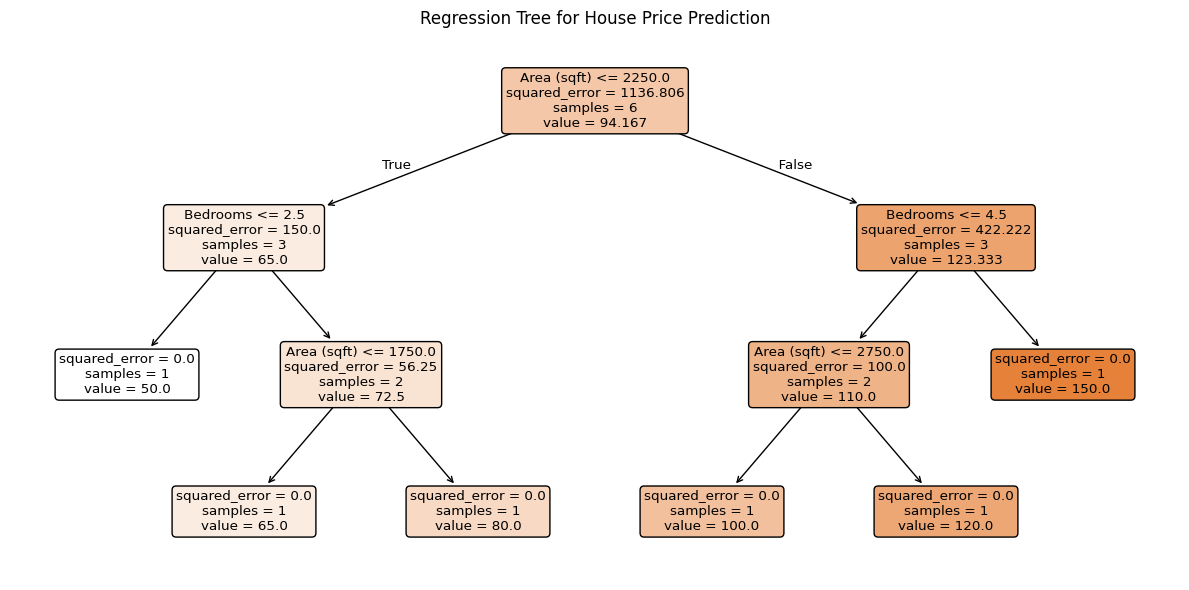

In [2]:
# @title
# Step 5: Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=['Area (sqft)', 'Bedrooms'], filled=True, rounded=True)
plt.title("Regression Tree for House Price Prediction")
plt.tight_layout()
plt.show()

**Classification**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# 1. Generate sample classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, random_state=42, class_sep=1.5)

# 2. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

In [6]:
# Show detailed classification result for each test sample
print("\n📋 Classification Results (first 15 rows):")
print(f"{'Index':<6} {'Actual':<7} {'Predicted':<10} {'Match'}")
print("-" * 32)
for i in range(min(15, len(y_test))):
    actual = y_test[i]
    predicted = y_pred[i]
    match = "✅" if actual == predicted else "❌"
    print(f"{i:<6} {actual:<7} {predicted:<10} {match}")


📋 Classification Results (first 15 rows):
Index  Actual  Predicted  Match
--------------------------------
0      1       1          ✅
1      0       0          ✅
2      1       1          ✅
3      1       1          ✅
4      1       1          ✅
5      1       1          ✅
6      1       1          ✅
7      1       1          ✅
8      1       1          ✅
9      0       0          ✅
10     0       0          ✅
11     0       0          ✅
12     1       1          ✅
13     0       0          ✅
14     1       1          ✅


In [4]:
# 5. Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 6. Display all metrics
print(f"✅ Accuracy:  {acc*100:.2f}%")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall:    {rec:.2f}")
print(f"✅ F1 Score:  {f1:.2f}")

✅ Accuracy:  96.67%
✅ Precision: 0.96
✅ Recall:    0.96
✅ F1 Score:  0.96


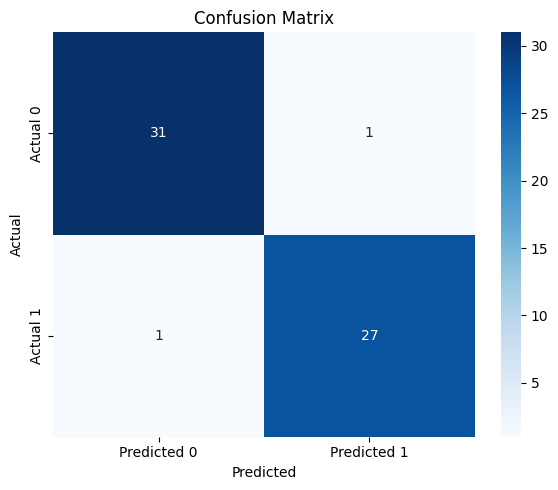

In [5]:
# 7. Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

**Multilabel classification**

📋 Multi-label Classification Report:
              precision    recall  f1-score   support

      Action       0.68      0.91      0.78        23
      Comedy       0.90      0.85      0.88        41
       Drama       0.83      0.88      0.85        33

   micro avg       0.81      0.88      0.84        97
   macro avg       0.80      0.88      0.84        97
weighted avg       0.82      0.88      0.84        97
 samples avg       0.81      0.78      0.78        97



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


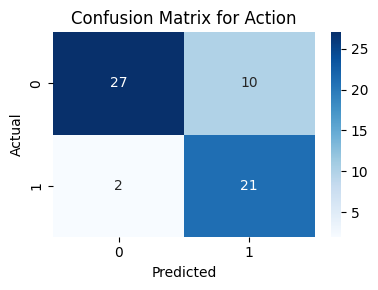

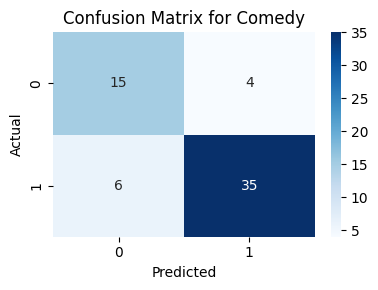

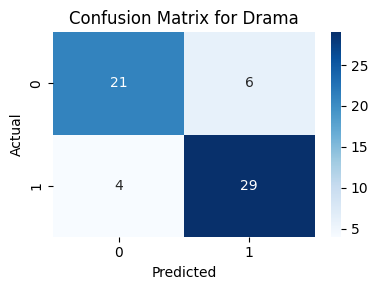

In [7]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate synthetic multi-label data
X, y = make_multilabel_classification(n_samples=200, n_features=10, n_classes=3, n_labels=2, random_state=42)

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Wrap LogisticRegression in MultiOutputClassifier
base_model = LogisticRegression()
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)

# 4. Predict
y_pred = multi_model.predict(X_test)

# 5. Classification report
print("📋 Multi-label Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Action", "Comedy", "Drama"]))

# 6. Plot confusion matrix for each label
for i, genre in enumerate(["Action", "Comedy", "Drama"]):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {genre}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# OVERFITTING


**PRUNING**

🌲 Unpruned Tree Accuracy: 0.94


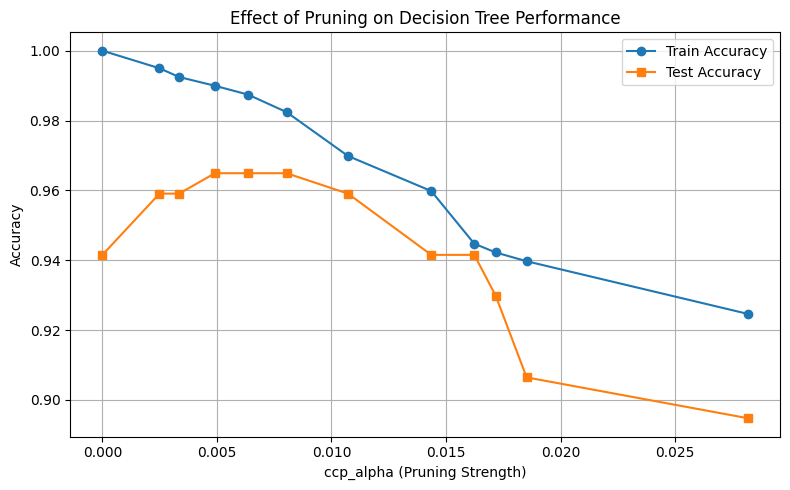

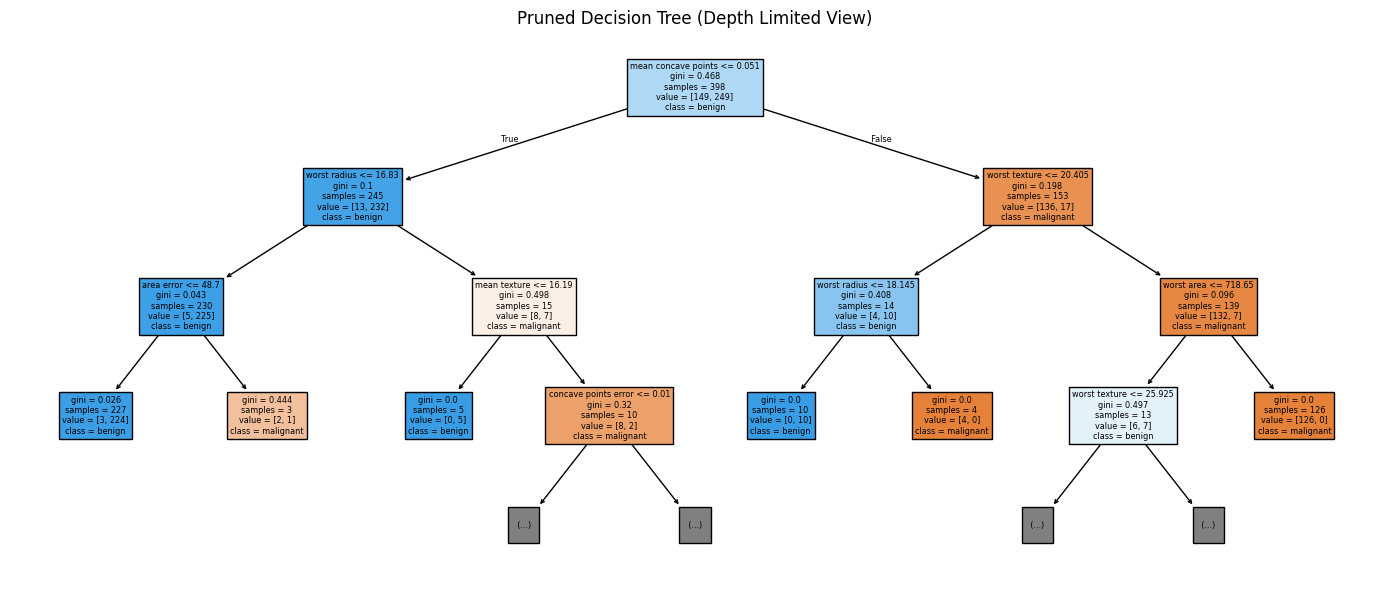

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 1. Load sample data
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train an unpruned tree
unpruned = DecisionTreeClassifier(random_state=42)
unpruned.fit(X_train, y_train)

# 4. Evaluate unpruned
y_pred = unpruned.predict(X_test)
acc_unpruned = accuracy_score(y_test, y_pred)
print(f"🌲 Unpruned Tree Accuracy: {acc_unpruned:.2f}")

# 5. Find effective alphas for pruning
path = unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude last (full pruning)

# 6. Train trees for different alphas
trees = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)

# 7. Evaluate accuracy vs alpha
train_scores = [clf.score(X_train, y_train) for clf in trees]
test_scores = [clf.score(X_test, y_test) for clf in trees]

# 8. Plot accuracy vs alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='s', label='Test Accuracy')
plt.xlabel("ccp_alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Effect of Pruning on Decision Tree Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Show a pruned tree
best_tree = trees[np.argmax(test_scores)]  # Tree with best test accuracy

plt.figure(figsize=(14, 6))
plot_tree(best_tree, filled=True, feature_names=data.feature_names, class_names=data.target_names, max_depth=3)
plt.title("Pruned Decision Tree (Depth Limited View)")
plt.tight_layout()
plt.show()